# Supervised Algorithms Homework

In this homework assignment, you will apply three fundamental machine learning algorithms to famous datasets:

1. **Linear Regression**: Boston Housing Price Prediction
2. **Logistic Regression**: Breast Cancer Classification
3. **Decision Tree**: Titanic Survival Prediction

### Instructions

- Implement **at least** one algorithm
- Complete each section carefully
- Add your code where indicated by `# YOUR CODE HERE`
- Provide comments explaining your approach

In [90]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Specific Algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics and Datasets
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# 1: Linear Regression - Boston Housing Price Prediction

### Task
- Load the Boston Housing dataset
- Preprocess the data
- Split into training and testing sets
- Train a Linear Regression model
- Evaluate model performance

In [91]:
# Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features and target
X, y = boston.data, boston.target

In [92]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
len(X_train), len(X_test)

(404, 102)

In [94]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# TODO: Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
# TODO: Make predictions and calculate performance metrics
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
# TODO: Print performance metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 24.2911
Root Mean Squared Error: 4.9286
Mean Absolute Error: 3.1891
R² Score: 0.6688


Il modello spiega circa il 67% della varianza nei dati. L'errore medio è di circa 3.19 unità, il che significa che le previsioni sono abbastanza vicine ai valori reali.

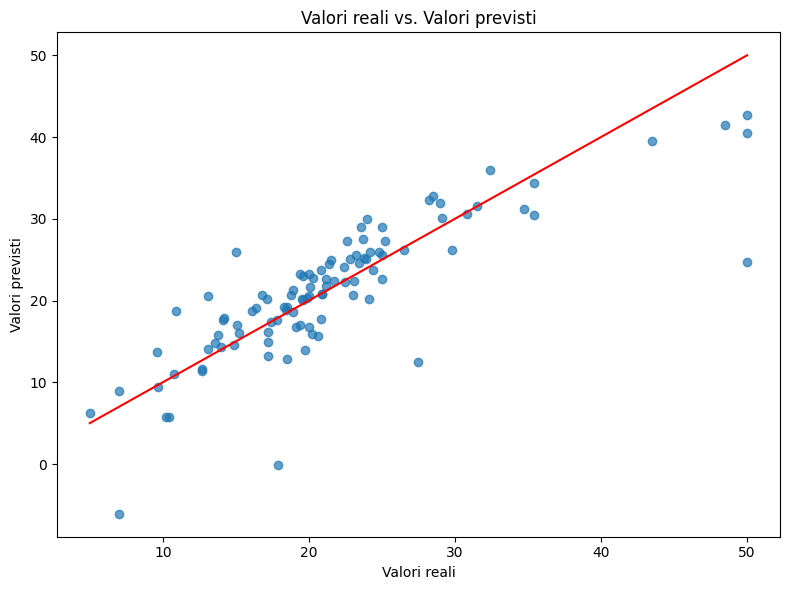

In [98]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Valori reali')
plt.ylabel('Valori previsti')
plt.title('Valori reali vs. Valori previsti')
plt.tight_layout()
plt.show()

## Part 2: Logistic Regression - Breast Cancer Classification

### Task
- Load the Breast Cancer dataset
- Preprocess the data
- Split into training and testing sets
- Train a Logistic Regression model
- Evaluate model performance

In [99]:
breast_cancer = load_breast_cancer()
X_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_cancer = breast_cancer.target

In [100]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

In [101]:
len(X_train), len(y_train), len(X_test), len(y_test)

(455, 455, 114, 114)

In [102]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# TODO: Train a Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [104]:
# TODO: Make predictions and calculate performance metrics
y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,  y_pred)

In [105]:
# TODO: Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy: 0.97 → Il modello classifica correttamente il 97% dei casi, il che indica un'eccellente performance complessiva.

Precision e Recall → Sia per la classe 0 che per la classe 1, precisione e richiamo sono molto alti, il che significa che il modello è affidabile nel distinguere entrambe le classi.

F1-score → Un valore vicino a 1.0 per entrambe le classi conferma un ottimo equilibrio tra precision e recall.

Macro e Weighted Avg → Essendo entrambi 0.97, il modello è ben bilanciato e non favorisce una classe a discapito dell’altra.

Nel complesso, sembra che il modello funzioni molto bene.

## Part 3: Decision Tree - Titanic Survival Prediction

### Task
- Load the Titanic dataset
- Preprocess the data (handling missing values, encoding categorical variables)
- Split into training and testing sets
- Train a Decision Tree Classifier
- Evaluate model performance

In [106]:
# Load Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [107]:
print(titanic.head())
print(titanic.columns)

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents

In [108]:
# Data Preprocessing
# TODO: Handle missing values
nan_counts = titanic.isnull().sum()
print(nan_counts)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [109]:
# Feature selection

features = ['Pclass', 'Sex', 'Age', 'Fare']
X_titanic = titanic[features]
y_titanic = titanic['Survived']

In [110]:
# TODO: Scale the features
numeric_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex']

In [111]:
# TODO: Encode the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Applica StandardScaler alle colonne numeriche
        ('cat', OneHotEncoder(), categorical_features)  # Applica OneHotEncoder alle colonne categoriche
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42))  
])

In [112]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [113]:
# TODO: Train a Decision Tree Classifier
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [118]:
# TODO: Make predictions and calculate performance metrics
y_pred = model.predict(X_test)

In [119]:
# TODO: Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8033707865168539


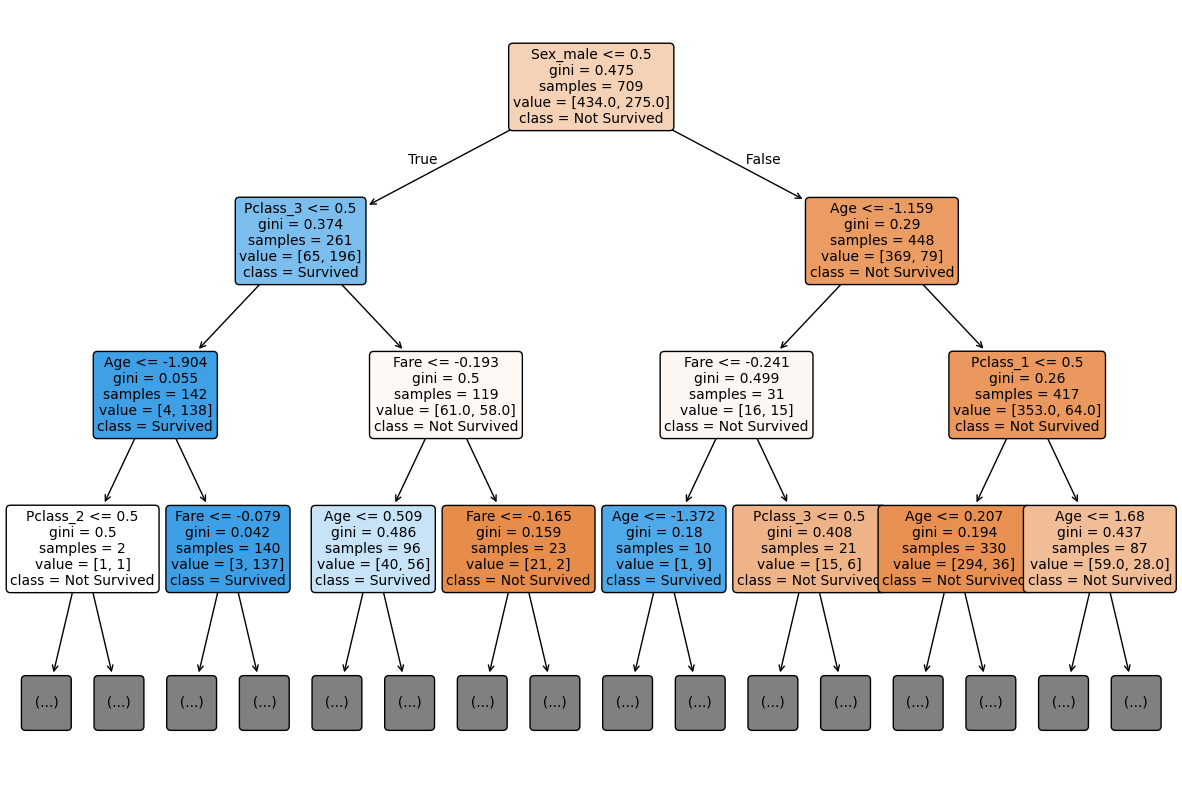

In [117]:
# TODO: Visualize Decisoion Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(classifier, 
          feature_names=all_feature_names, 
          class_names=['Not Survived', 'Survived'], 
          filled=True, 
          fontsize=10,
          max_depth=3,  # Limita la profondità
          rounded=True)
plt.show()

Il modello di classificazione basato su Decision Tree ha raggiunto un'accuratezza del 80.34% nel predire la sopravvivenza nel dataset. Questo risultato suggerisce che l'albero decisionale è in grado di fare previsioni abbastanza precise.

La visualizzazione dell'albero decisionale, limitata a una profondità di 3 livelli, ci offre una comprensione chiara delle principali variabili e delle decisioni che il modello sta prendendo. Le suddivisioni si basano principalmente su caratteristiche come l'età e la classe di passeggero, indicando che questi fattori sono determinanti nel prevedere la sopravvivenza.